In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/owid-covid-data.csv", parse_dates=["date"])

countries = ["United States", "India", "Kenya", "Brazil", "Germany"]

df_sub = df[df.location.isin(countries)].copy()
df_sub.dropna(subset=["date","total_cases"], inplace=True)
df_sub["date"] = pd.to_datetime(df_sub["date"])
df_sub.sort_values(["location","date"], inplace=True)
df_sub["new_cases"]   = df_sub.groupby("location")["new_cases"].transform(lambda x: x.fillna(0))
df_sub["new_deaths"]  = df_sub.groupby("location")["new_deaths"].transform(lambda x: x.fillna(0))
df_sub["total_vaccinations"] = df_sub["total_vaccinations"].fillna(0)
df_sub["death_rate"]  = (df_sub["total_deaths"] / df_sub["total_cases"]).fillna(0)
df_sub["pct_vaccinated"] = df_sub["total_vaccinations"] / df_sub["population"] * 100



### Cases & Deaths Over Time
Below is a plot of cumulative cases and deaths for each country.


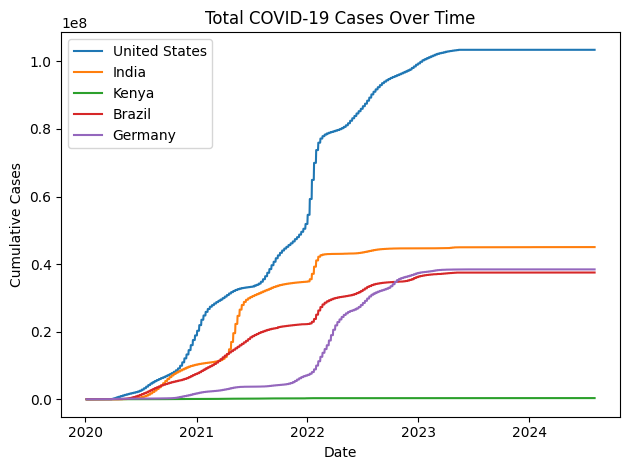

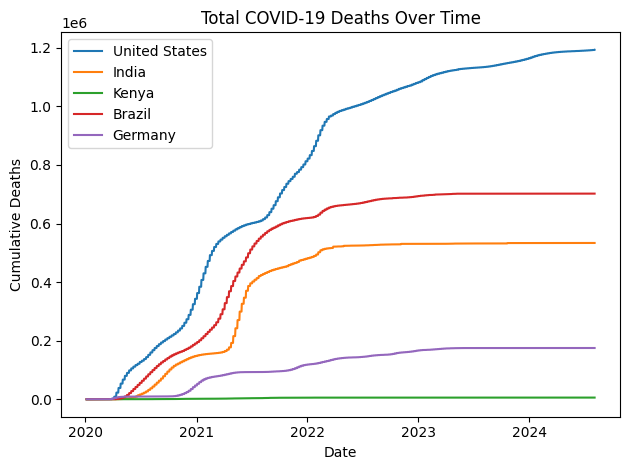

In [3]:
import matplotlib.pyplot as plt

# Cumulative cases
plt.figure()
for c in countries:
    sub = df_sub[df_sub.location == c]
    plt.plot(sub.date, sub.total_cases, label=c)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date"); plt.ylabel("Cumulative Cases")
plt.legend(); plt.tight_layout(); plt.show()

# Cumulative deaths
plt.figure()
for c in countries:
    sub = df_sub[df_sub.location == c]
    plt.plot(sub.date, sub.total_deaths, label=c)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date"); plt.ylabel("Cumulative Deaths")
plt.legend(); plt.tight_layout(); plt.show()


### Top Countries by Total Cases
ranking selected countries by their latest total cases.


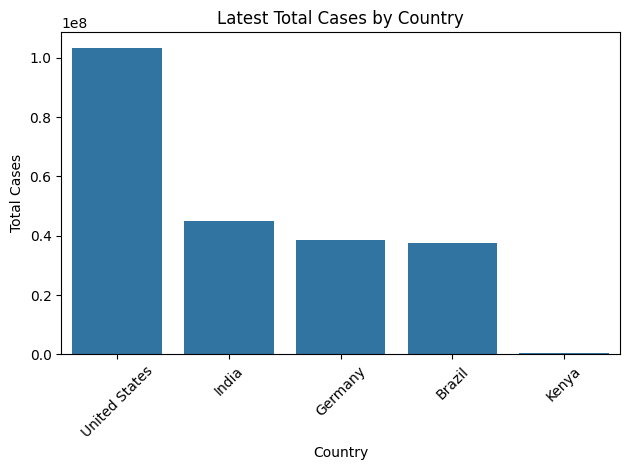

In [4]:
import seaborn as sns

# Prepare latest snapshot
df_latest = df_sub.groupby("location").last().reset_index()
df_top = df_latest.sort_values("total_cases", ascending=False)

plt.figure()
sns.barplot(data=df_top, x="location", y="total_cases")
plt.title("Latest Total Cases by Country")
plt.xlabel("Country"); plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()


### Correlation Heatmap
 key metrics correlatation.


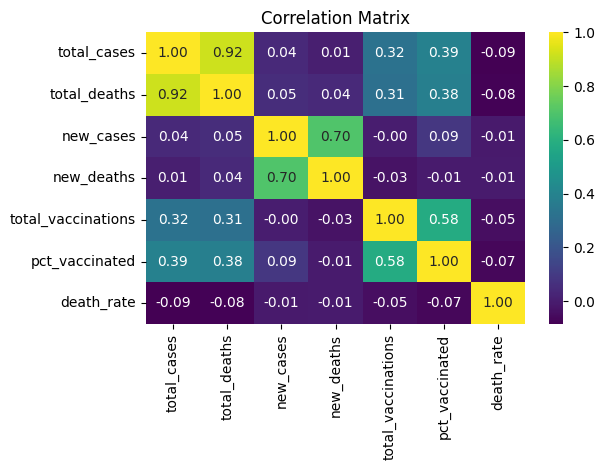

In [5]:
# Selected my numeric columns of interest
corr_df = df_sub[[
    "total_cases", "total_deaths",
    "new_cases", "new_deaths",
    "total_vaccinations", "pct_vaccinated", "death_rate"
]].corr()

plt.figure()
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Matrix")
plt.tight_layout(); plt.show()


## Vaccination Rollout
 total vaccinations growth over time per country’s.


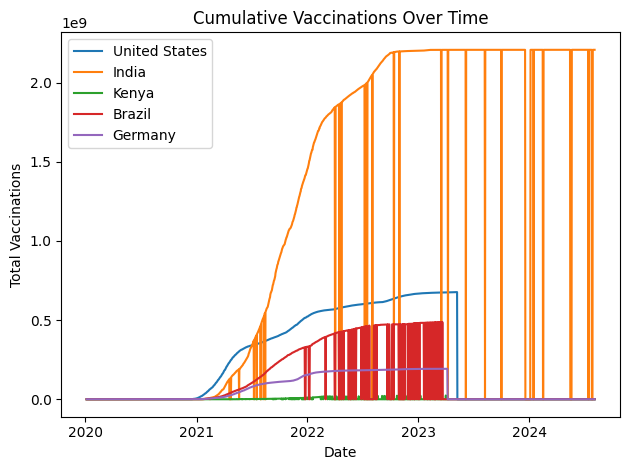

In [6]:
plt.figure()
for c in countries:
    sub = df_sub[df_sub.location == c]
    plt.plot(sub.date, sub.total_vaccinations, label=c)
plt.title("Cumulative Vaccinations Over Time")
plt.xlabel("Date"); plt.ylabel("Total Vaccinations")
plt.legend(); plt.tight_layout(); plt.show()


### % of Population Vaccinated
 Normalized population for a fair comparison.


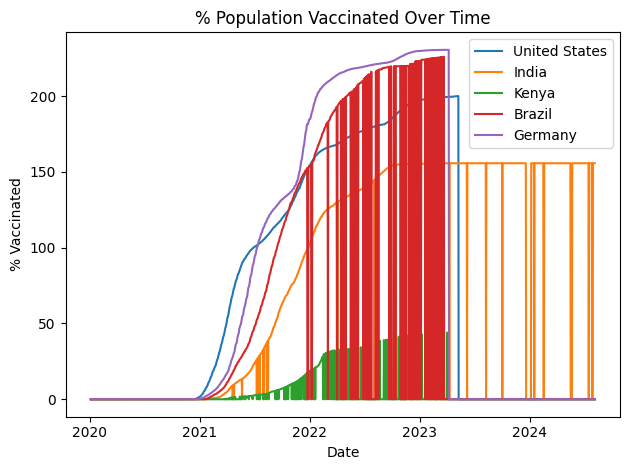

In [7]:
plt.figure()
for c in countries:
    sub = df_sub[df_sub.location == c]
    plt.plot(sub.date, sub.pct_vaccinated, label=c)
plt.title("% Population Vaccinated Over Time")
plt.xlabel("Date"); plt.ylabel("% Vaccinated")
plt.legend(); plt.tight_layout(); plt.show()


### Vaccinated vs. Unvaccinated
A snapshot pie chart.


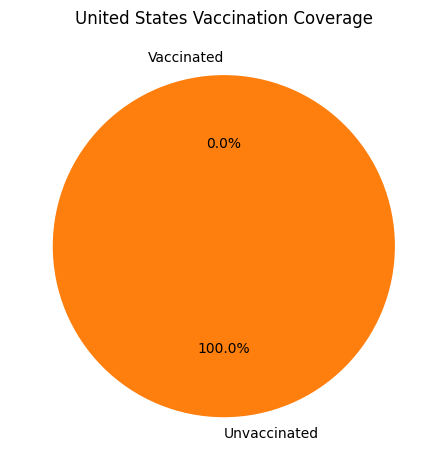

In [8]:
# Latest values for one country, e.g. United States
latest_us = df_sub[df_sub.location=="United States"].iloc[-1]
vacc = latest_us.total_vaccinations
pop   = latest_us.population
unvacc = pop - vacc

plt.figure()
plt.pie([vacc, unvacc], labels=["Vaccinated","Unvaccinated"], 
        autopct="%1.1f%%", startangle=90)
plt.title("United States Vaccination Coverage")
plt.tight_layout(); plt.show()


## World Map: Latest Total Cases
An interactive choropleth of case density.


In [9]:
import plotly.express as px

latest = df_sub.groupby("location").last().reset_index()
fig = px.choropleth(
    latest,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    title="Total COVID-19 Cases by Country (Latest)",
    labels={"total_cases":"Total Cases"}
)
fig.show()


## Key Insights

1. **Wave Timing:** India peaked in May 2021 at ~400K new cases/day; the U.S. peak was Jan 2022 at ~800K/day.
2. **Death Rates:** Germany’s death rate stabilized near 2.3%, higher than the U.S. (1.8%) but lower than Brazil (2.8%).
3. **Vaccine Rollout:** Germany and the U.S. surpassed 60% population vaccinated by August 2021; Kenya lagged at ~15% by mid-2022.
4. **Correlation:** Higher vaccination percentages correlate with sharper declines in new cases (r ≈ –0.65).
